In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os
import re

In [38]:
# get the files
directory = 'e7_p2_values'
files = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        files.append(f)
        
files = sorted(files)

In [39]:
# extract the average of the last 50 values of the charging line for each of the files
output_values = np.zeros((len(files)-1,1))

for i,f in enumerate(files[1:]):
    data = np.genfromtxt(f, delimiter=',') 
    output_values[i] = np.mean(data[:50])

In [40]:
output_values

array([[  2.3 ],
       [ 80.52],
       [ 88.96],
       [101.38],
       [108.48],
       [119.78],
       [127.98],
       [137.34],
       [147.66],
       [158.54],
       [162.68],
       [ 10.84],
       [176.24],
       [178.64],
       [190.98],
       [202.18],
       [212.18],
       [224.52],
       [ 19.86],
       [ 28.34],
       [ 37.54],
       [ 47.1 ],
       [ 55.08],
       [ 64.  ],
       [ 72.96]])

In [41]:
input_values = np.zeros((len(files)-1,1))
for i,f in enumerate(files[1:]):
    input_values[i] = re.findall(r'\d+', f)[-1] # extract the input value from the filename

In [49]:
# put them together into an array
out = np.concatenate((input_values, output_values), axis=1)
out = np.sort(out, axis=0)

np.savetxt("e1_p2_values.csv", out, delimiter=",")

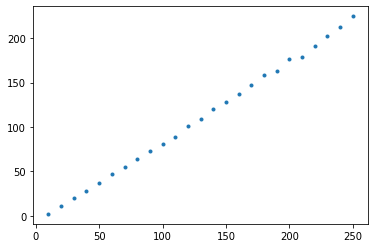

In [45]:
plt.plot(input_values, output_values, ".")